### Importing all the required Libraies

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import keras
import os
import os.path
import sys
import itertools
import xgboost as xgb
import librosa                                                          #To extract the data from the audio files.
import librosa.display
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier                      #For KNN
from sklearn.svm import SVC   
from sklearn.svm import LinearSVC                                          #For SVM
from sklearn.preprocessing import LabelEncoder                          #For Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score



### Importing Datafile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset = pd.read_csv('/content/drive/MyDrive/CPE PROJECT/features-2.csv')

In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
# print (Y)
print(X.shape)
# print(Y.shape)

(14640, 162)


In [ ]:
#print(Y)
Y1 = Y.copy()
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
#print(Y)

In [ ]:
d={}
Y_enc=Y.argmax(axis=1)
for i in range(len(Y1)):
  d[Y1[i]] = Y_enc[i]
for i in d.keys():
  print(i," = ",d[i])


neutral  =  5
angry  =  0
sad  =  6
happy  =  4
calm  =  1
fear  =  3
surprise  =  7
disgust  =  2


### Splitting the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# print some details
# number of samples in training data
print("[+] Number of training samples:", x_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", x_test.shape[0])

print("[+] Number of features:", x_train.shape[1])

[+] Number of training samples: 10980
[+] Number of testing samples: 3660
[+] Number of features: 162


### Standardization


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10980, 162), (10980, 8), (3660, 162), (3660, 8))

### Code for confusion Matrix


In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix of This Algorithm',cmap=plt.cm.Reds):
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > threshold else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision tree


#### APPROACH 1 : Without any methods to improve accuracy:

The Test Accuracy is : 68.72%


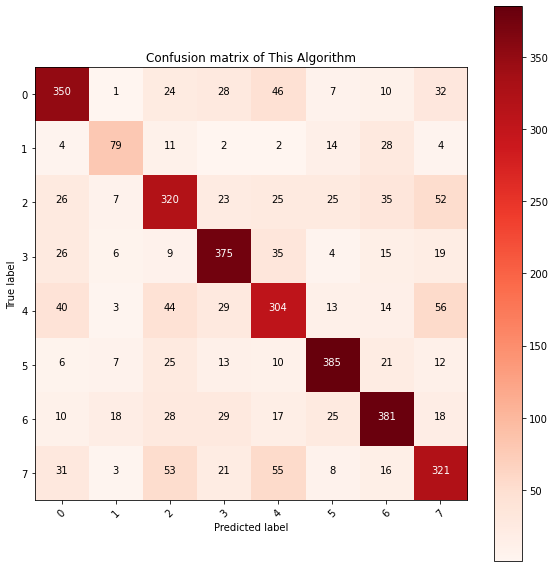

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dtree_model = DecisionTreeClassifier().fit(x_train, y_train) 


dtree_predictions = dtree_model.predict(x_test) 
acc=accuracy_score(y_true=y_test,y_pred=dtree_predictions)
print("The Test Accuracy is : {:.2f}%".format(acc*100))
# creating a confusion matrix 
C=confusion_matrix(y_test.argmax(axis=1), dtree_predictions.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

# desisiontree

#### APPROACH 2 : With method to increase accuracy:

The Test Accuracy is : 68.88%


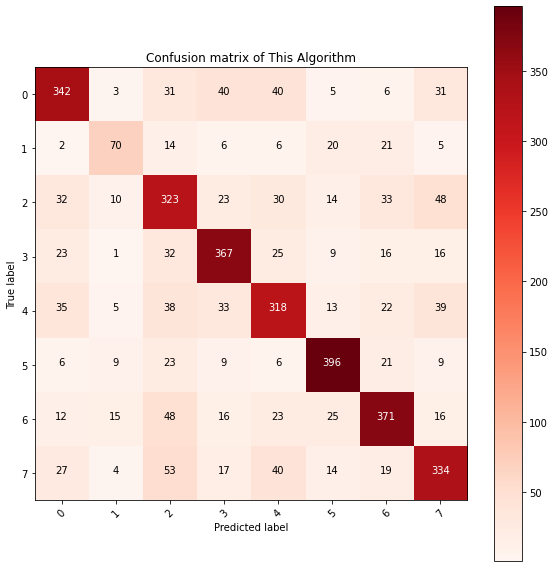

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# dcs = GridSearchCV(DecisionTreeClassifier(random_state=1,max_depth=250),
#                   param_grid={'min_samples_split': range(2, 2000, 50)},
#                   refit='AUC', return_train_score=True)
# dcs.fit(x_train, y_train)
#dtree_predictions = dcs.predict(x_test) 
dtree_model2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=150, min_samples_split=2,
                                     min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=0).fit(x_train, y_train) 
dtree_predictions2 = dtree_model2.predict(x_test) 
acc=accuracy_score(y_true=y_test,y_pred=dtree_predictions2)
print("The Test Accuracy is : {:.2f}%".format(acc*100))
# creating a confusion matrix 
C=confusion_matrix(y_test.argmax(axis=1), dtree_predictions2.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

# desisiontree( with tuning)

### SVM

#### APPROACH 1 :Without any methods to improve accuracy

The testing accuracy is : 76.75%


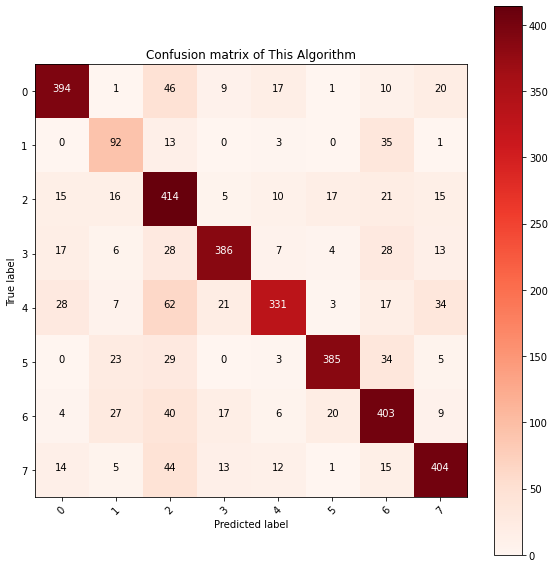

In [ ]:
from sklearn.svm import SVC
import numpy as np
# import matplotlib as mpl
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# clf = GridSearchCV(svc, parameters)

svc=SVC()
svc.fit(x_train, y_train.argmax(axis = 1))
y_pred = svc.predict(x_test)
accsvm = accuracy_score(y_true=y_test.argmax(axis = 1),y_pred = y_pred)
print("The testing accuracy is : {:.2f}%".format(accsvm*100))
C = confusion_matrix(y_test.argmax(axis = 1), y_pred)
plot_confusion_matrix(C,classes = list(set(Y.argmax(axis = 1))))

#### APPROACH 2 : With GridSearch CV

The testing accuracy is : 82.84%


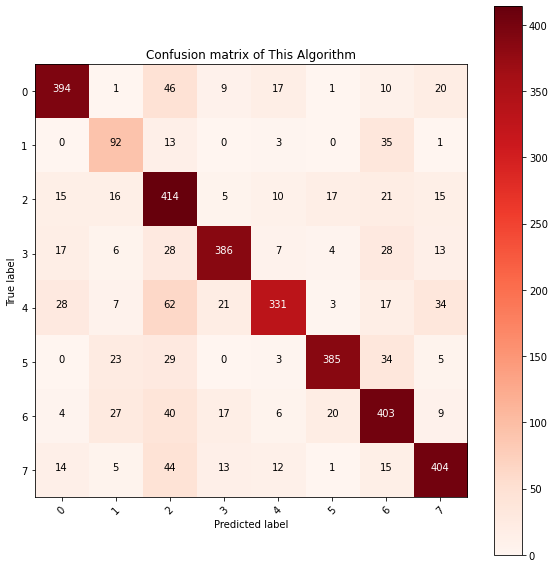

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc2=SVC()
clf = GridSearchCV(svc2, parameters)
clf.fit(x_train, y_train.argmax(axis = 1))

y_pred2 = clf.predict(x_test)
accsvm = accuracy_score(y_true=y_test.argmax(axis = 1),y_pred = y_pred2)
print("The testing accuracy is : {:.2f}%".format(accsvm*100))
C = confusion_matrix(y_test.argmax(axis = 1), y_pred)
plot_confusion_matrix(C,classes = list(set(Y.argmax(axis = 1))))

### Random Forest

#### APPROACH 1 :Without any methods to improve accuracy




Test Set Accuracy =  63.0 %


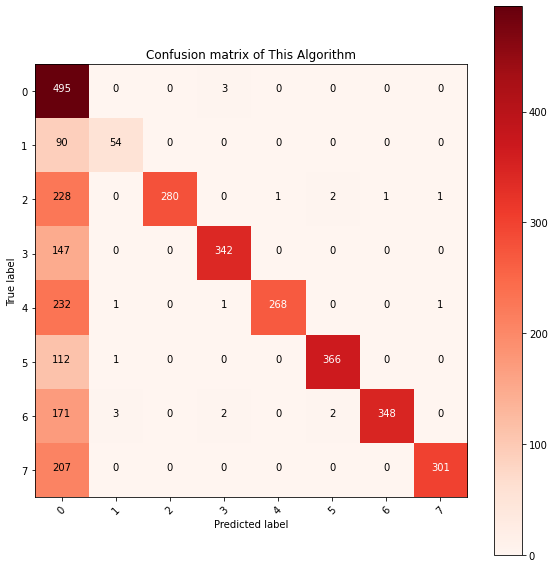

In [ ]:

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train,y_train)
# Predict
pred_probs = rf_classifier.predict(x_test)
pred = np.argmax(pred_probs, axis=-1)
print('Test Set Accuracy = ',100*(round(accuracy_score(y_true=y_test,y_pred=pred_probs),2)),"%")
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=pred)
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))


#### APPROACH 2 : With methods to improve accuracy:( with parameter tuning)



Test Set Accuracy =  64.0 %


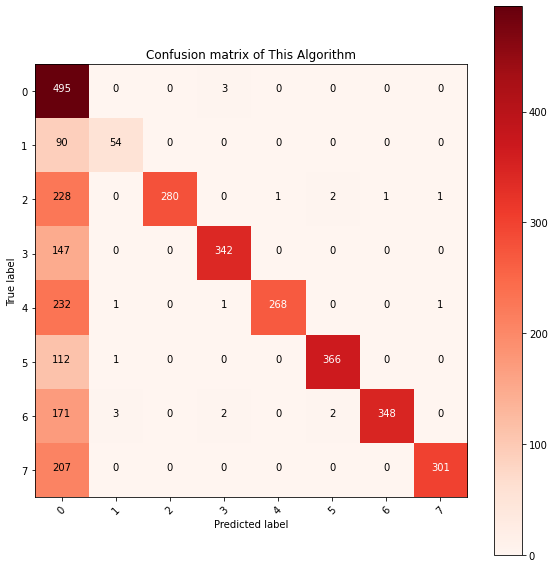

In [ ]:

rf_classifier2 = RandomForestClassifier(n_estimators=200, criterion='entropy', 
                                       max_depth=None,min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                       max_leaf_nodes=None,bootstrap=True, oob_score=False,
                                       n_jobs=1, random_state=100, verbose=0, warm_start=False,
                                       class_weight=None)
rf_classifier2.fit(x_train,y_train)
# Predict
pred_probs2 = rf_classifier2.predict(x_test)
pred2 = np.argmax(pred_probs, axis=-1)
print('Test Set Accuracy = ',100*(round(accuracy_score(y_true=y_test,y_pred=pred_probs2),2)),"%")
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=pred2)
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

#Rondom Forest

### KNN

#### APPROACH 1 : Without methods to increase accuracy

Accuracy: 77.02%


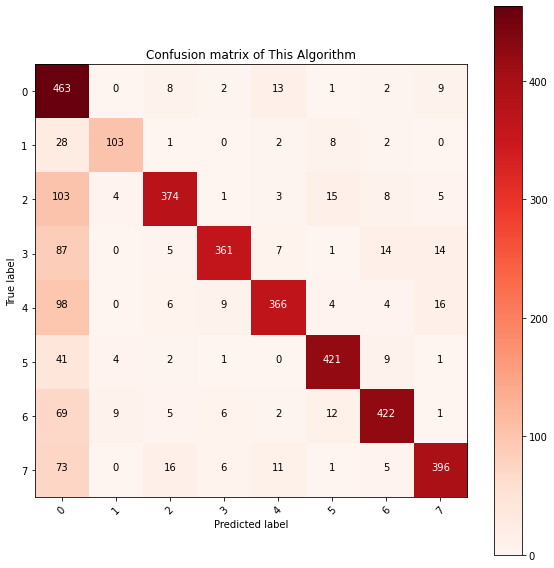

In [ ]:
from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 31))
# print(k_range)
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)
knn_class = KNeighborsClassifier()
# grid = GridSearchCV(knn_class, param_grid, cv=10, scoring='accuracy') 
knn_class.fit(x_train,y_train)
ypred=knn_class.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
print("Accuracy: {:.2f}%".format(accuracy*100))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=ypred.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

#### APPROACH 2 : With GridsearchCV to increase accuracy

Accuracy: 87.05%


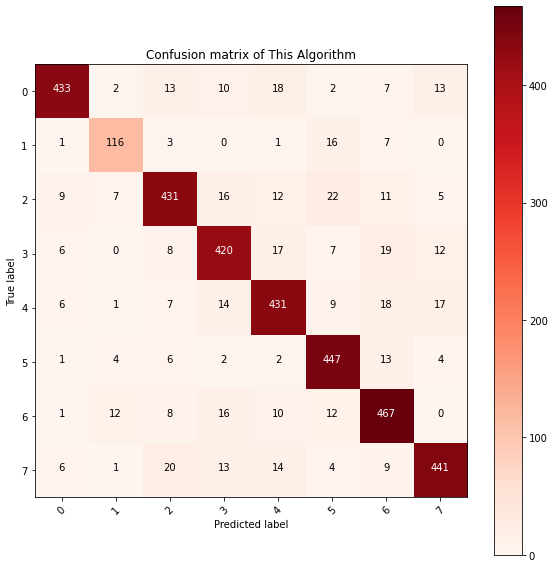

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
# print(k_range)
param_grid = dict(n_neighbors=k_range)
# print(param_grid)
knn_class = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, p=2,
           weights='uniform')
grid = GridSearchCV(knn_class, param_grid, cv=10, scoring='accuracy') 
grid.fit(x_train,y_train)
ypred2=grid.predict(x_test)
accuracy = accuracy_score(y_test, ypred2)
print("Accuracy: {:.2f}%".format(accuracy*100))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=ypred2.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))



### MLP 

#### APPROACH 1 : Without methods to increase accuracy:

Accuracy: 85.60%


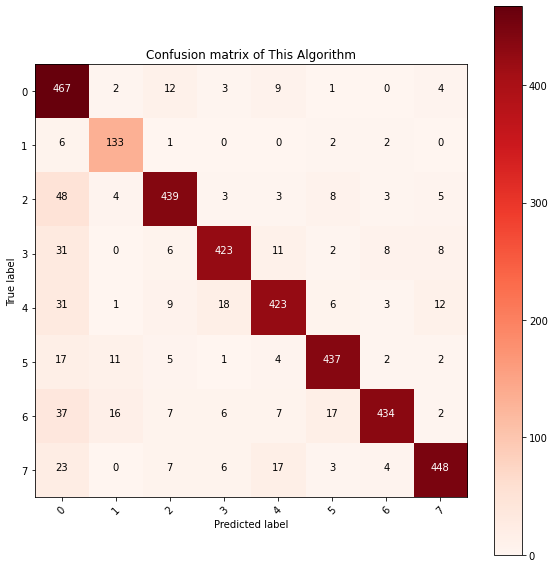

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,150,75), learning_rate='adaptive', max_iter=800)
model.fit(x_train,y_train)
MLPClassifier=MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,150,75), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=800, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=y_pred.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

#### APPROACH 2 : With methods to increase accuracy: ( increased hidden layers) 

Accuracy: 90.60%


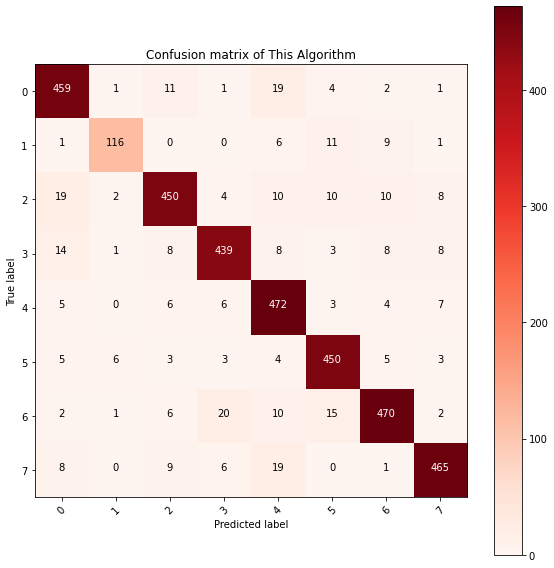

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(900,750,600,450,300,150,75), learning_rate='adaptive', max_iter=800)
model2.fit(x_train,y_train)
MLPClassifier =MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900,750,600,450,300,150,75), learning_rate='adaptive',
       learning_rate_init=0.0001, max_iter=800, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None,shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

y_pred2=model2.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=y_pred2.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

#hidden_layer_sizes=(900,750,600,450,300,150,75)